<a href="https://colab.research.google.com/github/bolby0216/myrepository2/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#tensorflow 1.13.1 버전을 설치합니다.
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 49kB/s 
     |████████████████████████████████| 3.2MB 46.7MB/s 
     |████████████████████████████████| 368kB 50.6MB/s 
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


In [2]:
#그에 맞는 CUDA 버전도 설치해줍니다.
!apt-get --purge remove "*cublas*" "cuda*"
!reboot
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt install cuda-10-0
!reboot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'cuda-cublas-dev-10-0' for glob '*cublas*'
Note, selecting 'libcublas-dev' for glob '*cublas*'
Note, selecting 'cuda-cublas-cross-qnx-10-0' for glob '*cublas*'
Note, selecting 'libcublas10' for glob '*cublas*'
Note, selecting 'libcublas-11-0' for glob '*cublas*'
Note, selecting 'cuda-cublas-10-0' for glob '*cublas*'
Note, selecting 'libcublas-dev-11-0' for glob '*cublas*'
Note, selecting 'libcublas9.1' for glob '*cublas*'
Package 'cuda-cublas-cross-qnx-10-0' is not installed, so not removed
Note, selecting 'cuda-cusparse-cross-qnx-10-0' for glob 'cuda*'
Note, selecting 'cuda-nsight-compute-11-0' for glob 'cuda*'
Note, selecting 'cuda-nvprof-11-0' for glob 'cuda*'
Note, selecting 'cuda-npp-cross-qnx-10-0' for glob 'cuda*'
Note, selecting 'cuda-nvprune-10-0' for glob 'cuda*'
Note, selecting 'cuda-nvprune-10-1' for glob 'cuda*'
Note, selecting 'cuda-nvprune-10-2' for glob 'cuda*

In [3]:
!pip install ipython-autotime
 
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=2986f1e0c30997467e0058681d26b63b72dba7a52886dbe347d846c0e4ed271a
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [4]:
import tensorflow as tf
import numpy as np
from IPython.display import Image

#MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

dddd = x_test

#test set에서 validation set을 10000개 만큼 분리해줍니다. 이는 validation accuracy가 진전되지 않을때 overfitting을 막기위해 사용됩니다.
x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]

print("train data has " + str(x_train.shape[0]) + " samples")
print("every train data is " + str(x_train.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

print("validation data has " + str(x_val.shape[0]) + " samples")
print("every train data is " + str(x_val.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

#flattening을 해줍니다
x_train = x_train.reshape(50000, 784)
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

#정규화를 해줍니다
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

#one hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
train data has 50000 samples
every train data is 28 * 28 image
validation data has 10000 samples
every train data is 28 * 28 image
test data has 10000 samples
every test data is 28 * 28 image
(50000, 784)
(10000, 784)
time: 4.36 s


In [5]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

time: 18.1 ms


In [6]:
def mlp(x):
    keep_prob = tf.placeholder(tf.float32)
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([784,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    h1 = tf.nn.dropout(h1, keep_prob=0.7)
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    h2 = tf.nn.dropout(h2, keep_prob=0.7)
    # output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h2, w3) + b3
    
    return logits

time: 9.99 ms


In [7]:
logits = mlp(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=y))

train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
time: 304 ms


0
epoch: 0, train accuracy: 0.1094, validation accuracy: 0.113, loss: 11814.342397460936
0
epoch: 1, train accuracy: 0.19564, validation accuracy: 0.1966, loss: 261.1993028640748
0
epoch: 2, train accuracy: 0.21442, validation accuracy: 0.2165, loss: 2.1426287698745723
0
epoch: 3, train accuracy: 0.25362, validation accuracy: 0.2637, loss: 2.096663613319397
8.555752396583557
epoch: 4, train accuracy: 0.28452, validation accuracy: 0.29, loss: 2.041821637153625
5.628687500953674
epoch: 5, train accuracy: 0.33346, validation accuracy: 0.3364, loss: 1.9548187804222106
5.783833622932434
epoch: 6, train accuracy: 0.3579, validation accuracy: 0.3621, loss: 1.8429017925262454
5.201364994049072
epoch: 7, train accuracy: 0.3789, validation accuracy: 0.3831, loss: 1.787557337284088
5.154827833175659
epoch: 8, train accuracy: 0.3971, validation accuracy: 0.4133, loss: 1.7188948798179629
4.690249681472778
epoch: 9, train accuracy: 0.40898, validation accuracy: 0.4193, loss: 1.6767598557472225
4.573

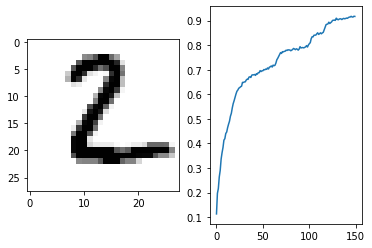

time: 3min 6s


In [18]:
import matplotlib.pyplot as plt


# 초기화
init = tf.global_variables_initializer()

# 하이퍼 파라미터
epoch_cnt = 1000  #학습횟수
batch_size = 1000 #학습률
iteration = len(x_train) // batch_size

#기타 변수
graph_cnt = 0
graph_y = []
val_acc_list = [0, 0, 0, 0, 0]

# 훈련 시작
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # 평균 loss 계산
            avg_loss += loss / iteration
            
        # 모델 validate
        preds = tf.nn.softmax(logits)  #logit값에 활성화함수 softmax를 적용
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # 정확도 계산
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        for j in range(4) :
          val_acc_list[j] = val_acc_list[j+1]
        val_acc_list[4] = cur_val_acc
        judge = 0
        for j in range(1,5) :
          if (val_acc_list[0] == 0) : continue
          else :
            judge += val_acc_list[j] / val_acc_list[0]
        print(judge)
        
        graph_y.append(cur_val_acc)
        graph_cnt = graph_cnt + 1
        #
        preds = tf.nn.softmax(logits)  #logit값에 활성화함수 softmax를 적용
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        train_accuracy = accuracy.eval({x: x_train, y: y_train})
        #
        print("epoch: "+str(epoch)+", train accuracy: "+ str(train_accuracy) +", validation accuracy: " 
              + str(cur_val_acc) +', loss: '+str(avg_loss))
        if(cur_val_acc >= 0.91 and judge-4 <= 0.0007) :
          graph_x = list(range(graph_cnt))
          break
        graph_x = list(range(graph_cnt))

    
    # 모델 테스트
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # 정확도 계산
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))

    # 테스트를 위해 임의의 MNIST 이미지를 넣어줍니다
    keep_prob = tf.placeholder(tf.float32)
    prediction=tf.argmax(preds,1)
    predint = prediction.eval(feed_dict={x: [x_test[1]],keep_prob: 1.0}, session=sess)
    # 예측값을 출력
    print("[Predicted Number] :", predint[0])

    # 예측값이 맞는지 비교하기 위해 해당 MNIST 이미지를 보여줍니다
    plt.subplot(1, 2, 1)
    plt.imshow(dddd[1], cmap=plt.cm.binary)

    # validation accuracy의 지표를 그래프로 나타냅니다
    plt.subplot(1, 2, 2)
    plt.plot(graph_x, graph_y)
    plt.show()


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.13.1
time: 1.1 ms
